In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

from KMeans import My_KMeans

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sk_kmeans = KMeans(n_clusters=4)
my_kmeans = My_KMeans(k=4)

X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)
df = pd.DataFrame(X)
df.columns = ['x', 'y']
df

,x,y
0,-0.841778,7.866552
1,-1.215153,8.014846
2,1.843208,-0.072221
3,-1.352334,7.529442
4,1.773949,-0.423201
...,...,...
695,-1.353432,3.165605
696,-0.973870,8.412865
697,-1.831415,2.286754
698,-1.846398,3.304915


## Performance Comparison

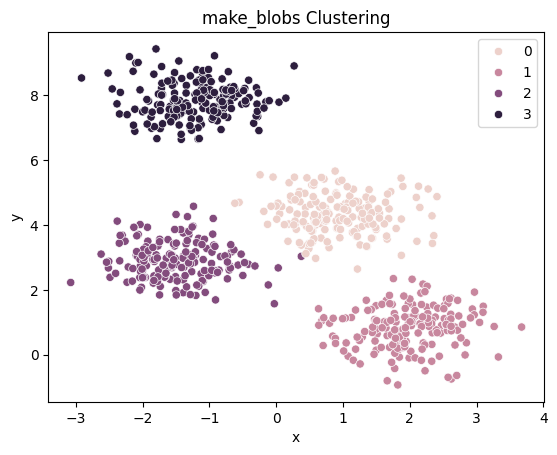

In [2]:
sns.scatterplot(data=df, x=df.x, y=df.y, hue=cluster_assignments).set_title('make_blobs Clustering')
plt.show()

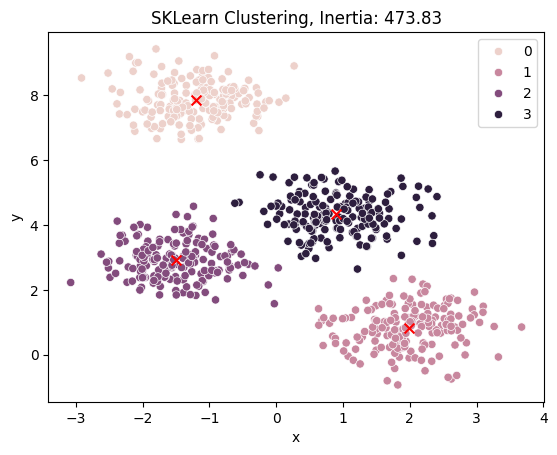

In [3]:
sk_kmeans.fit(X)
sns.scatterplot(data=df, x=df.x, y=df.y, hue=sk_kmeans.labels_).set_title(f'SKLearn Clustering, Inertia: {sk_kmeans.inertia_:.2f}')
centroids = sk_kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], s=50, color='red', label='Centroid', marker='x')
plt.show()

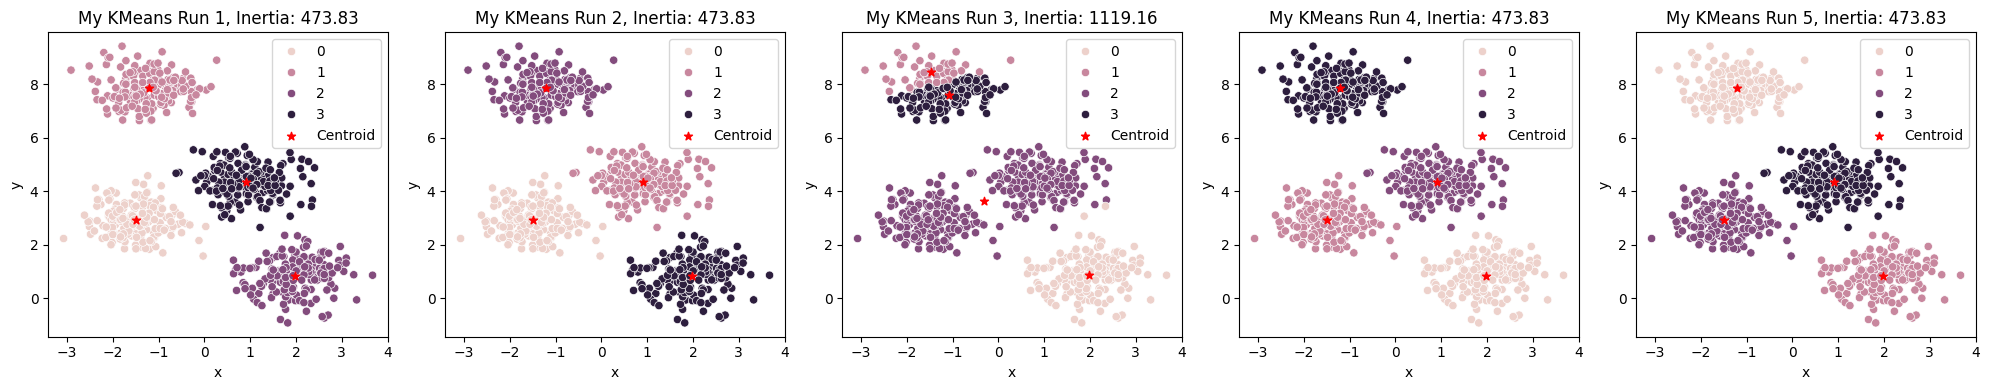

In [4]:
num_runs = 5
fig, axes = plt.subplots(1, num_runs, figsize=(20, 4))

for i in range(num_runs):
    my_hypos, my_centroids = my_kmeans.fit(X)
    
    sns.scatterplot(data=df, x=df.x, y=df.y, hue=my_hypos, ax=axes[i])
    axes[i].scatter(my_centroids[:, 0], my_centroids[:, 1], color='red', label='Centroid', marker='*')
    axes[i].set_title(f'My KMeans Run {i + 1}, Inertia: {my_kmeans.inertia_():.2f}')
    axes[i].legend(loc='best')
    
plt.tight_layout()
plt.show()

My algorithm heavily depends on which points are chosen for the initial centroids but *can*, and usually does, perform as optimally as Sci-kit Learn's implementation.

## Choose and run clustering algorithms

## Taxi Data Set

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [6]:
taxi_df = pd.read_csv('Taxi_Trips__2013-2023_.csv')
taxi_df

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,52dc9029821e61db30a51838cb3cd711bd0e03cb,275f3f891b8c0ba8f2958873f850d2a03993c99f5f79f6...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,1140.0,11.20,NaN,NaN,76.0,NaN,...,21.0,49.75,Cash,4053 - 40193 Adwar H. Nikola,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
1,11eeb6710caa0606028c7ba025bfa18c277886e8,6c87f1d023a9d7146ae81b6aa4648bf98cec52cceb9f08...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,660.0,2.70,NaN,NaN,32.0,7.0,...,0.0,13.00,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
2,113aa7bf346c585bb941cda2d5c0015c8a1472f0,bb4e75d3065311c33024a434640731c43fd2cf9e4482eb...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,480.0,0.00,NaN,NaN,8.0,24.0,...,0.0,9.75,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
3,2503e3944e5c82b89638447ad361638111129375,57c40509cae37a0e5e536a657cdb7f8c6824314bc466a7...,02/01/2023 12:15:00 AM,02/01/2023 12:45:00 AM,1620.0,0.00,1.703198e+10,NaN,76.0,NaN,...,28.0,91.00,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN
4,23ddcfba2ad714fe0303909961ea74873be50da2,40720025b84fa778c47d6637db01b1d8f2de2eabafa529...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,360.0,0.10,NaN,NaN,76.0,NaN,...,4.0,13.75,Cash,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101783,9209df4c3541198fda3173a226f2df619a806022,dee6032433df09fe8d3fd4fa958380308c902dc98f81c3...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,760.0,2.69,1.703183e+10,1.703132e+10,28.0,32.0,...,0.0,10.90,Mobile,Medallion Leasin,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
101784,f0957a8f6bef37bb2872649fb3c76ad1a179acab,3f6562a2a18861cf21a21101c14cc91dd7c4d72cdce80f...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,4.0,0.00,NaN,NaN,8.0,8.0,...,0.0,77.40,Credit Card,Chicago Independents,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
101785,4cb74df671cfccceb9b592f347ef1a94c1540c7a,b31f46efa11263565e3dba91f26ff96b74516e8108ac56...,02/14/2023 10:30:00 AM,02/14/2020 06:00:00 PM,NaN,2.90,NaN,NaN,8.0,24.0,...,0.0,13.50,Cash,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
101786,7f24c5101df65952ef318f558b8b071989ff7c17,65057dc10e707a18a32bc4371c5db0b828e90f9caf1068...,04/27/2023 11:15:00 AM,04/21/2019 09:30:00 PM,NaN,15.10,NaN,NaN,76.0,7.0,...,4.0,52.90,Credit Card,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)


In [7]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     101788 non-null  object 
 1   Taxi ID                     101779 non-null  object 
 2   Trip Start Timestamp        101788 non-null  object 
 3   Trip End Timestamp          101788 non-null  object 
 4   Trip Seconds                101763 non-null  float64
 5   Trip Miles                  101788 non-null  float64
 6   Pickup Census Tract         35179 non-null   float64
 7   Dropoff Census Tract        35054 non-null   float64
 8   Pickup Community Area       95650 non-null   float64
 9   Dropoff Community Area      92192 non-null   float64
 10  Fare                        101681 non-null  float64
 11  Tips                        101681 non-null  float64
 12  Tolls                       101681 non-null  float64
 13  Extras        

In [8]:
taxi_df.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,101763.000000,101788.000000,3.517900e+04,3.505400e+04,95650.000000,92192.000000,101681.000000,101681.000000,101681.000000,101681.000000,101681.000000,95657.000000,95657.000000,92489.000000,92489.000000
mean,1102.644891,6.021135,1.703149e+10,1.703140e+10,33.230946,25.300764,20.466054,2.452347,0.014503,1.679117,24.739358,41.898703,-87.689956,41.892116,-87.657546
std,1831.031101,7.572349,3.696445e+05,3.377955e+05,25.309183,20.270499,18.103452,3.918353,0.602782,5.208910,22.641634,0.064621,0.104274,0.059306,0.063430
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625
25%,420.000000,0.870000,1.703108e+10,1.703108e+10,8.000000,8.000000,7.750000,0.000000,0.000000,0.000000,9.500000,41.878866,-87.695013,41.878866,-87.663518
50%,836.000000,2.600000,1.703132e+10,1.703132e+10,32.000000,28.000000,13.500000,0.000000,0.000000,0.000000,16.000000,41.895033,-87.642649,41.892508,-87.633308
75%,1516.000000,10.800000,1.703184e+10,1.703184e+10,50.000000,32.000000,31.000000,3.000000,0.000000,1.000000,33.900000,41.949829,-87.626211,41.922686,-87.625192
max,86003.000000,814.300000,1.703198e+10,1.703198e+10,77.000000,77.000000,999.000000,250.000000,78.000000,182.000000,999.000000,42.015934,-87.534903,42.021224,-87.534903


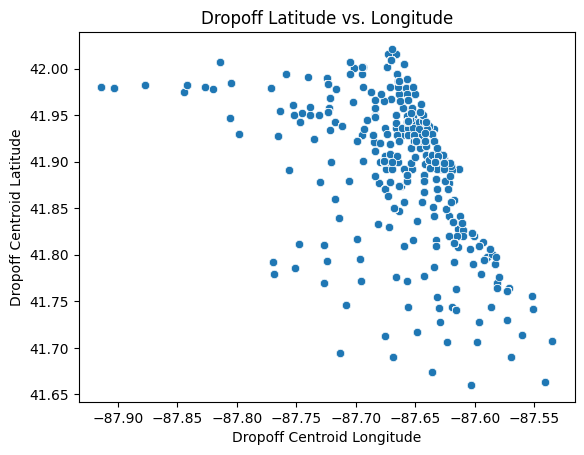

In [9]:
# Will look at dropoff locations and drop rows without any data
dropoff_df = taxi_df[['Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']].dropna()
sns.scatterplot(data=dropoff_df, x='Dropoff Centroid Longitude', y='Dropoff Centroid Latitude')
plt.title('Dropoff Latitude vs. Longitude')
plt.show()

In [10]:
ss = StandardScaler()
scaled_df = ss.fit_transform(dropoff_df)

## Initially tried DBSCAN

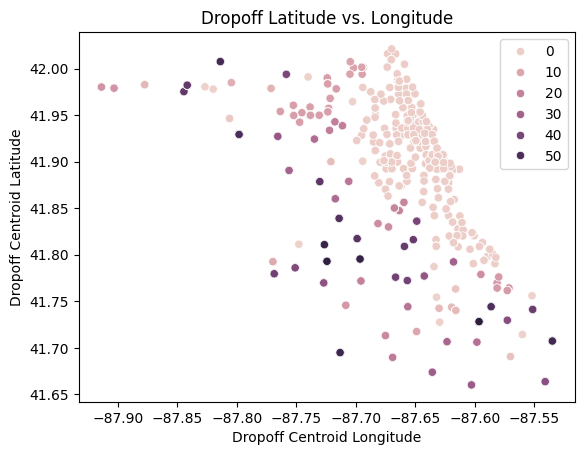

In [11]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(scaled_df)
dbscan_clusters = dbscan.labels_
sns.scatterplot(data=dropoff_df, x='Dropoff Centroid Longitude', y='Dropoff Centroid Latitude', hue=dbscan.labels_)
plt.title('Dropoff Latitude vs. Longitude')
plt.show()

## K Means

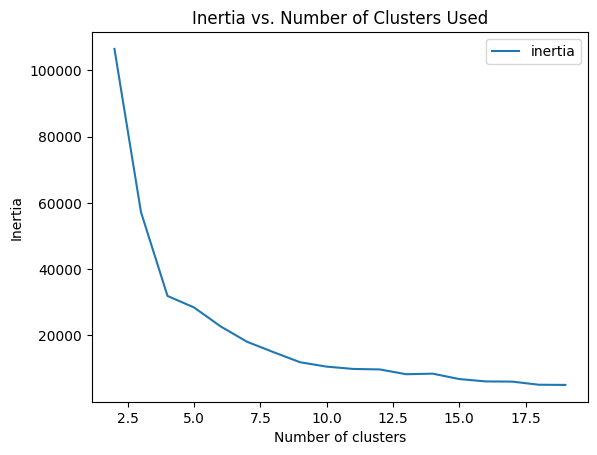

In [12]:
inertias = pd.DataFrame(data=[], index=range(2, 20), columns=['inertia'])

for k in range(2, 20):
    dropoff_kmeans = KMeans(n_clusters=k)
    dropoff_kmeans.fit(scaled_df)
    inertias.loc[k] = dropoff_kmeans.inertia_

inertias.plot()
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Inertia vs. Number of Clusters Used")
plt.show()

In [13]:
dropoff_kmeans = KMeans(n_clusters=6)
dropoff_kmeans.fit(scaled_df)

KMeans(n_clusters=6)

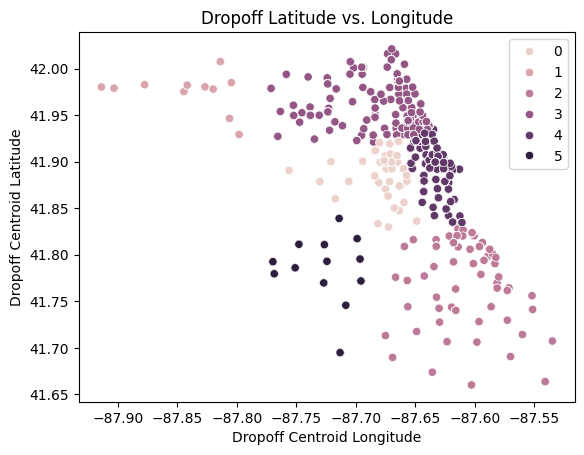

In [14]:
sns.scatterplot(data=dropoff_df, x='Dropoff Centroid Longitude', y='Dropoff Centroid Latitude', hue=dropoff_kmeans.labels_)
plt.title('Dropoff Latitude vs. Longitude')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
silhouette_score(dropoff_df, dropoff_kmeans.labels_)

0.5235973660986466

I had originally planned on using DBSCAN because the data didn't seem to have very spherical clusters. However, DBSCAN took a long time to run and writing a loop to try to find the optimal eps and num samples made my computer's RAM usage spike to 99%, which I don't recommend...So I ended up using k means with the elbow method and finding that ~6 clusters seemed to be optimal. Just visually, k means seems to do a better job than I had anticipated and has a silhouette score of ~.52, which is pretty good.

## Mopsi Data Set

In [16]:
mopsi_df = pd.read_csv('MopsiLocationsUntil2012-Finland.txt', delimiter='\t', names=['Latitude', 'Longitude'])
mopsi_df = mopsi_df / 10000
mopsi_df

,Latitude,Longitude
0,62.5983,29.7439
1,62.6146,29.7440
2,62.6144,29.7456
3,62.6004,29.7394
4,62.6018,29.7437
...,...,...
13462,62.6042,29.7444
13463,62.5977,29.7443
13464,62.6050,29.7404
13465,62.5995,29.7426


In [17]:
mopsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13467 entries, 0 to 13466
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   13467 non-null  float64
 1   Longitude  13467 non-null  float64
dtypes: float64(2)
memory usage: 210.6 KB


In [18]:
mopsi_df.describe()

,Latitude,Longitude
count,13467.000000,13467.000000
mean,62.509478,28.900467
std,0.784433,2.039943
min,59.924700,21.201600
25%,62.593000,29.616400
50%,62.601800,29.744800
75%,62.619200,29.779650
max,69.783500,31.432800


<Axes: xlabel='Latitude', ylabel='Longitude'>

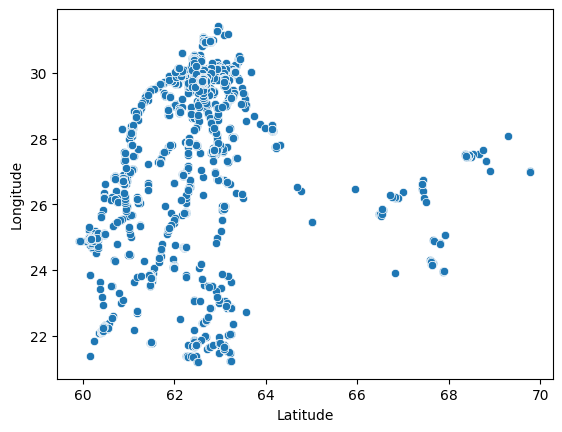

In [19]:
sns.scatterplot(data=mopsi_df, x='Latitude', y='Longitude')

<Axes: xlabel='Latitude', ylabel='Longitude'>

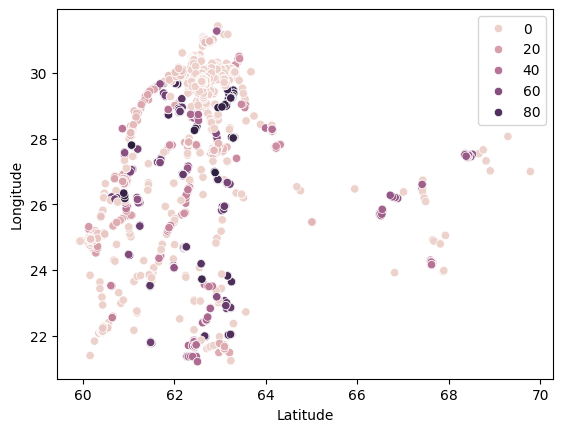

In [20]:
dbscan = DBSCAN(eps=.1, min_samples=5).fit(mopsi_df)
sns.scatterplot(data=mopsi_df, x='Latitude', y='Longitude', hue=dbscan.labels_)

<Axes: xlabel='Latitude', ylabel='Longitude'>

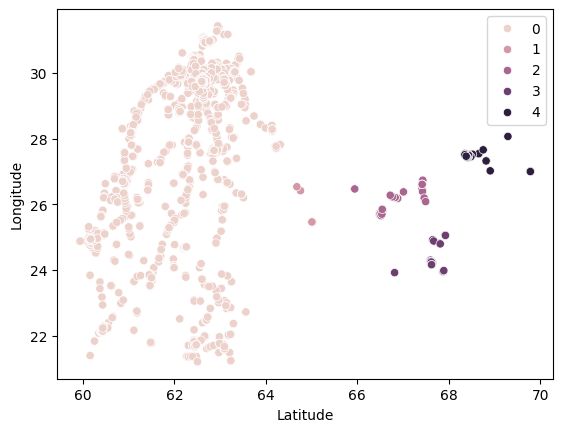

In [21]:
dbscan = DBSCAN(eps=1, min_samples=5).fit(mopsi_df)
sns.scatterplot(data=mopsi_df, x='Latitude', y='Longitude', hue=dbscan.labels_)

<Axes: xlabel='Latitude', ylabel='Longitude'>

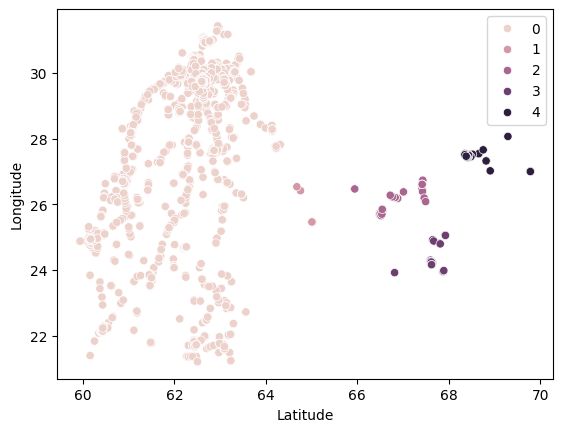

In [22]:
dbscan = DBSCAN(eps=1, min_samples=6).fit(mopsi_df)
sns.scatterplot(data=mopsi_df, x='Latitude', y='Longitude', hue=dbscan.labels_)

<Axes: xlabel='Latitude', ylabel='Longitude'>

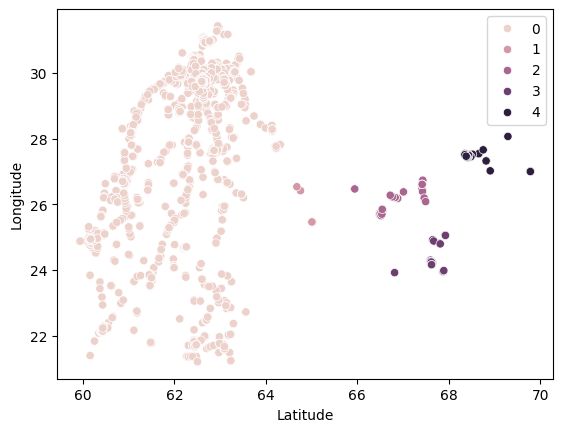

In [23]:
dbscan = DBSCAN(eps=1, min_samples=4).fit(mopsi_df)
sns.scatterplot(data=mopsi_df, x='Latitude', y='Longitude', hue=dbscan.labels_)

In [24]:
silhouette_score(mopsi_df, dbscan.labels_)

0.6074917137988989

Because this dataset is pretty significantly smaller than the taxi dataset I was able to run DBSCAN a lot faster and more successfully. Again, because this is geospatial data, I initially thought to use DBSCAN and it seems to fit the data pretty well. To be honest I just randomly seemed to have gotten lucky with a good eps and min_samples on my second guess so an eps of 1 and min_samples around 5 seems to fit the data pretty well but I'm not sure if it's the most optimal. Again I tried to use a for loop to test different eps's and sample sizes but it was taking too long so I just decided to manually guess. The silhouette score for this was ~.61, which is pretty good, and just visually it seems to cluster the data very well.